# Использование библиотек SymPy, NumPy и Matplotlib

### Индивидуальное домашнее задание

### Кайгородов Александр Александрович (kaa120), группа: Поток 2

С помощью библиотек языка Python необходимо:

- найти все асимптоты графика заданной функции;
- найти все точки экстремума функции;
- построить эскиз графика функции;
- изобразить все асимптоты графика;
- соединить пунктирной линией (см. образец) экстремумы функции с координатными осями;
- подписать на горизонтальной оси точки, через которые проходят вертикальные асимптоты (отличные от оси ;
- подписать на горизонтальной оси точки экстремума, а на вертикальной оси — значения функции в них; использовать  для этого ровно три значащих десятичных цифры;
- изменить при необходимости масштаб таким образом, чтобы были хорошо видны все экстремумы функции и факт приближения графика функции к его асимптотам при удалении от начала координат;
- в свободной от изображённых линий области рисунка разместить текст, содержащий задание рассматриваемой функции, координаты её точек экстремума и уравнения всех асимтот её графика.

Функция:

$\displaystyle y = \frac{\left(x - 4\right)^{2} \left(x + 4\right)}{\left(x - 6\right) \left(x - 1\right)}.$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [2]:
sp.var('x')
y = ((x-4)**2 * (x+4)) / ((x-6) * (x-1))

fun = sp.diff(y, x)
display(fun)

extrems = []
for root in list(filter(lambda t: t.is_real, sp.solve(fun, x))):
    extrems.append([float(root), float(y.subs(x, float(root)))]) 
extrems = [list(map(lambda x: round(x, 2), extrem)) for extrem in extrems]
print(extrems)

(x - 4)**2/((x - 6)*(x - 1)) - (x - 4)**2*(x + 4)/((x - 6)*(x - 1)**2) + (x + 4)*(2*x - 8)/((x - 6)*(x - 1)) - (x - 4)**2*(x + 4)/((x - 6)**2*(x - 1))

[[4.0, 0.0], [8.63, 13.49]]


In [3]:
# асимптоты
asym = sp.nroots((x-6)*(x-1), n=3)
k = float(sp.limit(y/x, x, sp.oo))
b = float(sp.limit(y-k*x, x, sp.oo))
asym = list(map(lambda x: float(x), asym))
#print(f'y = {k}*x + {b} and simple limits {asym}')

/home/alexkay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/alexkay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/home/alexkay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide


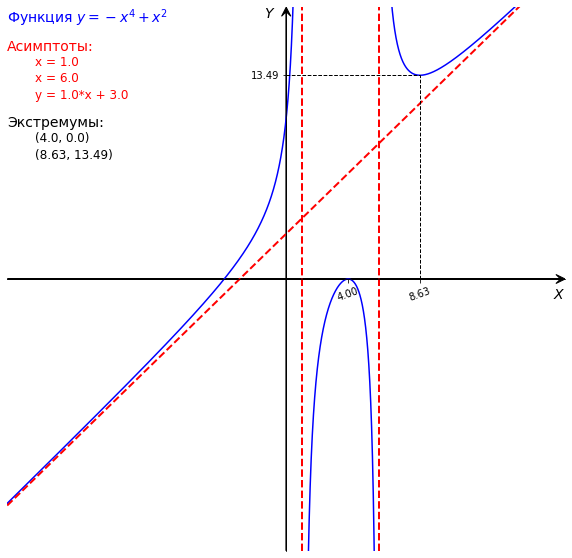

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing()

# Максимальные рассматриваемые значения переменных x и y
# подбирается для каждой из функций индивидуально
xymax = 18

# Диапазон [-xymax, xymax] определяет ряд параметров,
# связанных с изображением стрелок на осях координат
# и величинами смещений подписей
head_len = xymax/30
offset = head_len/4

# Текущий рисунок
fig = plt.gcf()
# Размер рисунка в дюймах
fig.set_size_inches(10, 10)
# Область рисования
ax = plt.gca()

# Интервалы изменения данных
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)

# Убираем стандартные деления (и подписи) на 
# границах области данных (будущих осях)
ax.set_xticks([])
ax.set_yticks([])

# Преобразуем границы области данных:
# рисуем стрелочки и подписываем оси координат
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_color('none')
ax.arrow(-xymax, 0.0, 2*xymax, 0.0, head_width=head_len,
    head_length=head_len, overhang = 0.5, color='k',
    length_includes_head= True) 
ax.arrow(0.0, -xymax, 0.0, 2*xymax, head_width=head_len,
    head_length=head_len, overhang = 0.5, color='k',
    length_includes_head= True) 
ax.text(1.0, 0.47, '$X$', fontsize=14, transform=ax.transAxes, 
    verticalalignment='center', horizontalalignment='right')
ax.text(0.47, 1.0, '$Y$', fontsize=14, transform=ax.transAxes, 
    verticalalignment='top', horizontalalignment='center')

dense = 2000

# general function for each interval
x = np.linspace(-xymax, asym[0], dense)
y = ((x-4)**2 * (x+4)) / ((x-6) * (x-1))
plt.plot(x, y, 'b-')

x = np.linspace(asym[0], asym[1], dense)
y = ((x-4)**2 * (x+4)) / ((x-6) * (x-1))
plt.plot(x, y, 'b-')

x = np.linspace(asym[1], xymax, dense)
y = ((x-4)**2 * (x+4)) / ((x-6) * (x-1))
plt.plot(x, y, 'b-')

# non-vertical asymptote
x = np.linspace(-xymax, xymax, dense)
y = x + 3
plt.plot(x, y, color="red", linewidth=2, linestyle="--")

# first order poles (vertical)
plt.axvline(asym[0], 0, 1, color="red", linewidth=2, linestyle="--")
plt.axvline(asym[1], 0, 1, color="red", linewidth=2, linestyle="--")

sp.var('x')

# Function
ax.text(0, 1.0, f'Функция $y = {sp.latex(x**2 - x**4)}$', fontsize=14,
    transform=ax.transAxes, color='b', verticalalignment='top')

# asymptotes
ax.text(0, 0.94, 'Асимптоты:', fontsize=14,
    transform=ax.transAxes, color='r', verticalalignment='top')
ax.text(0.05, 0.91, f'х = {asym[0]}' , fontsize=12,
    transform=ax.transAxes, color='r', verticalalignment='top')
ax.text(0.05, 0.88, f'х = {asym[1]}', fontsize=12,
    transform=ax.transAxes, color='r', verticalalignment='top')
ax.text(0.05, 0.85, f'y = {k}*x + {b}', fontsize=12,
    transform=ax.transAxes, color='r', verticalalignment='top')

#roots
ax.text(0.00, 0.80, 'Экстремумы:', fontsize=14,
    transform=ax.transAxes, color='black', verticalalignment='top')
ax.text(0.05, 0.77, f'({extrems[0][0]}, {extrems[0][1]})', fontsize=12,
    transform=ax.transAxes, color='black', verticalalignment='top')
ax.text(0.05, 0.74, f'({extrems[1][0]}, {extrems[1][1]})', fontsize=12,
    transform=ax.transAxes, color='black', verticalalignment='top')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks([extrems[0][0], extrems[1][0]], rotation=20) # X
plt.yticks([extrems[1][1]]) # Y

ex = extrems # it's for simpifying of writing...
plt.plot([ex[1][0], ex[1][0]], [0, ex[1][1]], color="black", linewidth=1, linestyle="--")
plt.plot([0, ex[1][0]], [ex[1][1], ex[1][1]], color="black", linewidth=1, linestyle="--")

plt.show()

In [5]:
# # delete singular points
# indexes = []
# for i in range(len(x)):
#     if x[i] < asym[0]+0.5 and x[i] > asym[0]-0.5: indexes.append(i)
#     if x[i] < asym[1]+0.1 and x[i] > asym[1]-0.1 : indexes.append(i)
# x = np.delete(x, indexes)